In [1]:
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [72]:
df = pd.read_csv("/SGRNJ06/randd/PROJECT/scATAC/project/self_pipe/P23082402_Zhejiang_University/20240129_YYZ20240115_ATAC_828_sc/YYZ20240115_ATAC_X3/outs/cell_qc_metrics.tsv", sep='\t')

In [73]:
def label(df):
    if df["cell_called"] == True:
        return "Cells"
    else:
        return "Non-cells"
df['cell_called'] = df.apply(label, axis=1)
df_cell = df[df['cell_called']=='Cells']
df_non = df[df['cell_called']=='Non-cells']

In [74]:
    singlecell_df = df
    fragment_counts = singlecell_df['fragments'].values
    cell_mask = (singlecell_df['cell_called']=='Cells')
    noncell_mask = (singlecell_df['cell_called']=='Non-cells')

    logbinmax = np.ceil(np.log10(fragment_counts.max()))
    xbins = list(np.hstack([np.arange(100), np.logspace(np.log10(100), logbinmax, 350)]))

In [75]:
    data_subplots = []
    for name, mask, color in zip(["Non-cells", "{} Cells".format("")],
                                 [noncell_mask, cell_mask],
                                 ["blue", "orange"]):
        # protect against really low depth samples, mixed up ref, severe under cell calling
        if mask.sum() > 0 and logbinmax > np.log10(100):
            counts, _ = np.histogram(fragment_counts[mask], xbins)
            data_subplots.append({
                "name": name,
                "x": xbins,
                "y": list(counts),
                "type": "scatter",
                "connectgaps": True,
                "fill": "tozeroy",
                "line": {"color": color},
            })

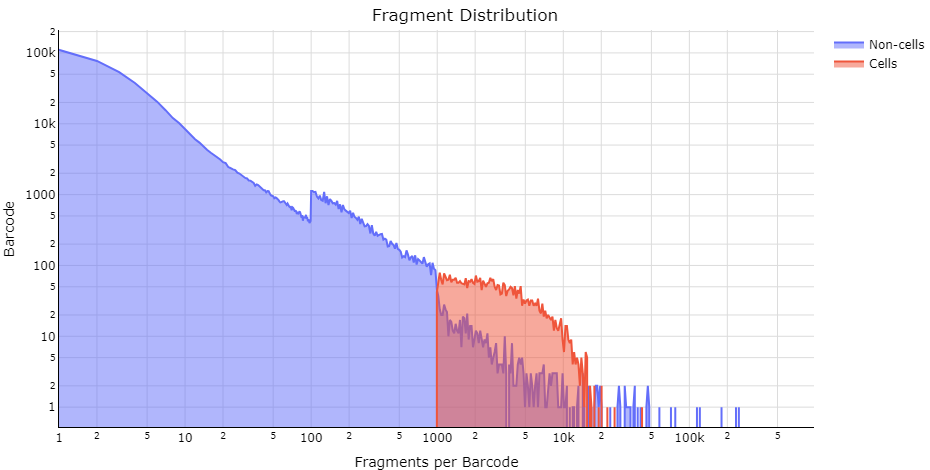

In [76]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_subplots[0]['x'], y=data_subplots[0]['y'], fill='tozeroy', connectgaps=True, name='Non-cells')) # fill down to xaxis
fig.add_trace(go.Scatter(x=data_subplots[1]['x'], y=data_subplots[1]['y'], fill='tozeroy', connectgaps=True, name='Cells')) # fill to trace0 y
fig.update_layout(
            width=470, height=470,
            title={"text": "Fragment Distribution",
                   'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
            xaxis={"type": "log", "color": "black", "gridcolor": "gainsboro", "linecolor": "black"},
            yaxis={"type": "log", "color": "black", "gridcolor": "gainsboro", "linecolor": "black"},
            xaxis_title = "Fragments per Barcode", yaxis_title = "Barcode", font=dict(size=12,color="Black"),
            margin=dict(l=50, r=0, t=30, b=30),
            plot_bgcolor="#FFFFFF",
            legend=dict(title_text=''),
        )
fig.write_image("/SGRNJ06/randd/USER/cjj/celedev/atac/MAESTRO/test/20240307fragdisplot/YYZ20240115_ATAC_X3.pdf", scale=4,)
fig.show()

In [25]:
df = pd.read_csv("/SGRNJ06/randd/USER/cjj/celedev/atac/MAESTRO/test/20240326tss/tss.csv")

In [26]:
df.columns = [str(i) for i in range(-1000,1001)]

In [42]:
df

-1000      -999      -998      -997  -996     -995      -994  \
0     0.000000  0.000000  0.000000  0.000000   0.0  0.00000  0.000000   
1     0.000000  0.000000  2.469136  4.938272   0.0  0.00000  0.000000   
2     0.000000  0.653595  0.653595  0.653595   0.0  0.00000  0.653595   
3     0.000000  0.000000  0.000000  0.000000   0.0  9.52381  0.000000   
4     0.000000  0.000000  3.418803  0.000000   0.0  0.00000  0.000000   
...        ...       ...       ...       ...   ...      ...       ...   
4509  4.081633  4.081633  0.000000  0.000000   0.0  0.00000  0.000000   
4510  0.000000  0.000000  0.000000  0.000000   0.0  0.00000  0.000000   
4511  0.000000  0.000000  0.000000  0.000000   0.0  0.00000  0.000000   
4512  1.000000  1.000000  1.000000  1.000000   1.0  1.00000  1.000000   
4513  0.000000  0.000000  0.000000  0.000000   0.0  0.00000  0.000000   

          -993      -992      -991  ...       991        992       993  \
0     0.000000  0.000000  0.000000  ...  0.000000   0.000000  0.000000   
1     0.000000  0.000000  0.000000  ...  4.938272   2.469136  2.469136   
2     0.000000  0.653595  0.653595  ...  1.307190   1.960784  0.653595   
3     0.000000  0.000000  9.523810  ...  0.000000   0.000000  9.523810   
4     0.000000  0.000000  0.000000  ...  0.000000   3.418803  1.709402   
...        ...       ...       ...  ...       ...        ...       ...   
4509  4.081633  0.000000  0.000000  ...  0.000000   0.000000  0.000000   
4510  0.000000  0.000000  0.000000  ...  0.000000  13.333333  0.000000   
4511  0.000000  0.000000  0.000000  ...  0.000000   5.263158  0.000000   
4512  1.000000  1.000000  1.000000  ...  1.000000   1.000000  1.000000   
4513  0.000000  0.000000  0.000000  ...  0.000000   0.000000  0.000000   

           994        995       996       997       998       999      1000  
0     0.000000   0.000000  1.801802  0.000000  0.000000  3.603604  1.801802  
1     0.000000   0.000000  0.000000  0.000000  0.000000  0.000000  2.469136  
2     2.614379   0.653595  1.960784  1.960784  0.000000  0.000000  1.307190  
3     0.000000   9.523810  0.000000  0.000000  0.000000  0.000000  0.000000  
4     1.709402   0.000000  1.709402  1.709402  1.709402  5.128205  3.418803  
...        ...        ...       ...       ...       ...       ...       ...  
4509  0.000000   8.163265  4.081633  4.081633  0.000000  0.000000  8.163265  
4510  0.000000  13.333333  0.000000  0.000000  0.000000  0.000000  0.000000  
4511  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
4512  1.000000   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
4513  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  

[4514 rows x 2001 columns]

In [ ]:
df[map(str, xvals)].sum(axis=0)

In [47]:
def calculate_tss_score_and_profile(relative_positions):
    tss_df = pd.read_csv(relative_positions)
    xvals = np.arange(-1000, 1000 + 1)
    tss_df.columns = [str(i) for i in range(-1000,1001)]
    yvals = tss_df[map(str, xvals)].sum(axis=0)
    if any(yvals > 0):
        min_nonzero = yvals[yvals > 0].min()
        yvals /= min_nonzero
        score = yvals.max()
        return score, np.array(yvals), xvals
    else:
        return 0.0, np.array(yvals), xvals

In [48]:
res = calculate_tss_score_and_profile("/SGRNJ06/randd/USER/cjj/celedev/atac/MAESTRO/test/20240326tss/tss.csv")

In [50]:
res

(35.5169663539098,
 array([1.        , 1.26371116, 1.10462313, ..., 1.86243645, 1.5844462 ,
        1.56209573]),
 array([-1000,  -999,  -998, ...,   998,   999,  1000]))

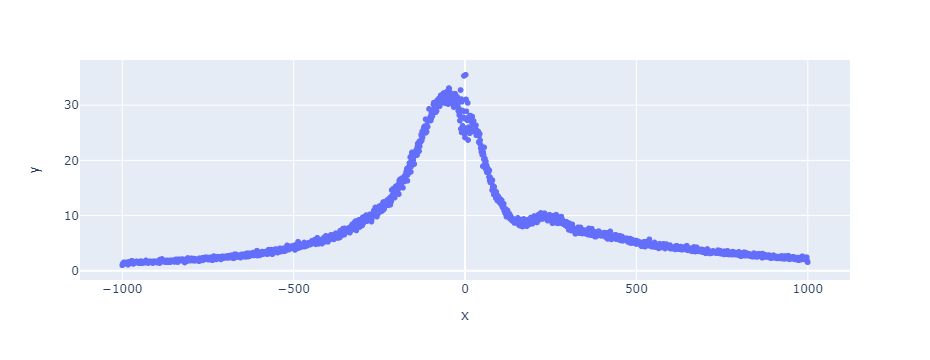

In [51]:
fig = px.scatter(res, x=res[2], y=res[1])
fig.show()

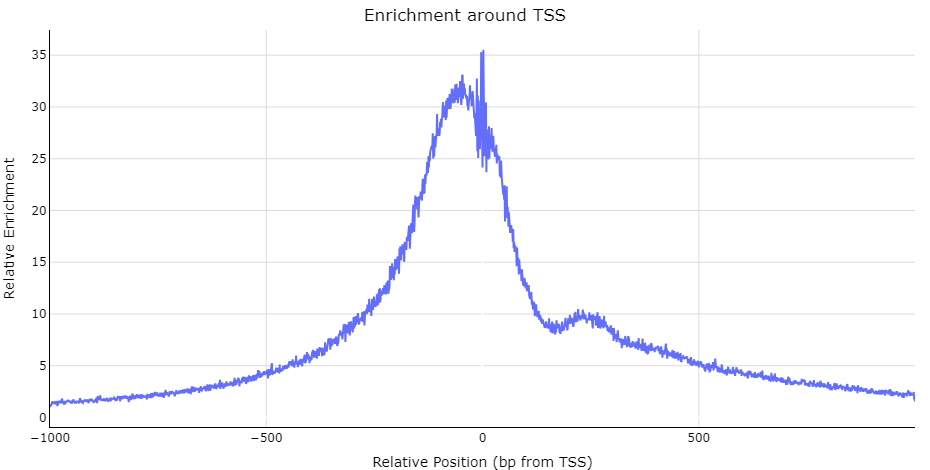

In [56]:
fig = go.Figure()
fig.add_trace(go.Scatter(  # 
    x=res[2], 
    y=res[1],               
    mode='lines'))
fig.update_layout(
            width=470, height=470,
            title={"text": "Enrichment around TSS",
                   'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
            xaxis={"type": "linear", "color": "black", "gridcolor": "gainsboro", "linecolor": "black"},
            yaxis={"type": "linear", "color": "black", "gridcolor": "gainsboro", "linecolor": "black"},
            xaxis_title = "Relative Position (bp from TSS)", yaxis_title = "Relative Enrichment", font=dict(size=12,color="Black"),
            margin=dict(l=50, r=0, t=30, b=30),
            plot_bgcolor="#FFFFFF",
        )
fig.show()
# fig.update_traces(marker_size=40)
# fig.update_layout(title={"text":f'{sample} (Correlation={calc_corr(df["Raw_Reads"], df["UMI_Counts"])})',
#                          'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
#                   xaxis_title = "Mean Raw_Reads", yaxis_title = "Mean UMI_Counts", font=dict(size=18,color="Black"))
